# SABR Model Test Code

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import imp
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(sys.path.index('')+1, 'D:/Github/PyFENG')
import pyfeng as pf
import option_models as opt
pf

<module 'pyfeng' from 'D:/Github/PyFENG\\pyfeng\\__init__.py'>

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [3]:
# Parameters
strike = np.linspace(75,125,num=25)
forward = 100
sigma = 0.2
texp = 1
vov = 0.5
rho = 0.25
beta = 1

In [4]:
# Create model
sabr_bsm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=beta)
#sabr_bsm.__dict__

In [5]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward, texp)
bsm_vol = sabr_bsm.vol_smile(strike, forward, texp)

price, bsm_vol

(array([25.63112985, 23.75128418, 21.92436819, 20.15929844, 18.464919  ,
        16.84954379, 15.32049449, 13.88369006, 12.5433379 , 11.30176115,
        10.15937353,  9.11479108,  8.16505218,  7.30590775,  6.53214252,
         5.83789336,  5.21693965,  4.66295032,  4.1696811 ,  3.73112202,
         3.34159961,  2.99584057,  2.68900456,  2.4166934 ,  2.17494321]),
 array([0.20400581, 0.20266888, 0.20161986, 0.20085527, 0.2003692 ,
        0.20015312, 0.20019595, 0.20048427, 0.20100266, 0.20173418,
        0.20266088, 0.20376432, 0.20502604, 0.20642803, 0.20795302,
        0.20958477, 0.2113082 , 0.21310949, 0.21497615, 0.21689693,
        0.2188618 , 0.22086191, 0.22288945, 0.22493758, 0.22700034]))

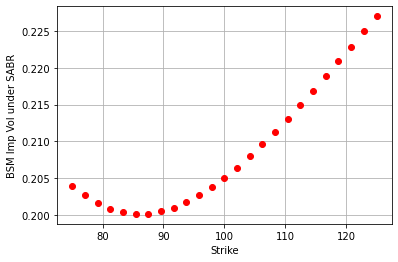

In [6]:
# volatility smile plot: try with different parameters
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (2) SABR for $\beta=0$

In [7]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20
texp = 1
alpha = 0.5
rho = -0.25

In [8]:
sabr_norm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=0)
price = sabr_norm.price(strike, forward, texp)
nvol = sabr_norm.vol_smile(strike, forward, texp, model='norm')

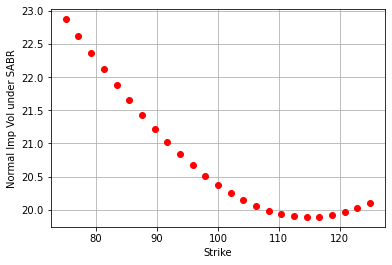

In [9]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (3) Smile calibration to 3 options

In [10]:
strike3 = np.array([90, 100, 110])
price3 = sabr_bsm.price(strike3, forward, texp)
vol3 = sabr_bsm.vol_smile(strike3, forward, texp)

price3, vol3

(array([13.60780137,  8.16505218,  4.76869334]),
 array([0.20057006, 0.20502604, 0.21274362]))

In [11]:
sabr_bsm.__dict__

{'sigma': 0.2,
 'intr': 0.0,
 'divr': 0.0,
 'is_fwd': False,
 'vov': 0.5,
 'rho': 0.25,
 'beta': 1}

In [12]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(vol3, strike3, forward, texp, is_vol=True)

{'sigma': 0.2000000000001008,
 'vov': 0.4999999998672808,
 'rho': 0.24999999998258432}

In [13]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(price3, strike3, forward, texp, is_vol=False)

{'sigma': 0.19999999979636335,
 'vov': 0.5000000129299839,
 'rho': 0.2499999894054446}

## 2. Pricing under MC method

In [14]:
strike = np.linspace(75,125,num=25)
forward = 100

In [15]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': 0.25, 'beta': 1}


In [16]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.63112985, 23.75128418, 21.92436819, 20.15929844, 18.464919  ,
        16.84954379, 15.32049449, 13.88369006, 12.5433379 , 11.30176115,
        10.15937353,  9.11479108,  8.16505218,  7.30590775,  6.53214252,
         5.83789336,  5.21693965,  4.66295032,  4.1696811 ,  3.73112202,
         3.34159961,  2.99584057,  2.68900456,  2.4166934 ,  2.17494321]),
 0)

Repeat the same for beta = 0

In [17]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormalMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.25, 'beta': 0}


In [18]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([26.59094359, 24.75316491, 22.95198866, 21.19221774, 19.47903728,
        17.81796274, 16.21475835, 14.6753216 , 13.20553214, 11.81106589,
        10.49717985,  9.26847793,  8.12867327,  7.08036718,  6.12486688,
         5.26206391,  4.4903905 ,  3.80686327,  3.2072135 ,  2.6860921 ,
         2.2373286 ,  1.85421785,  1.52980713,  1.25715953,  1.02957603]),
 0)

## 3. Pricing under conditional MC method

In [19]:
strike = np.linspace(75,125,num=25)
forward = 100

In [20]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': 0.25, 'beta': 1}


In [21]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_cmc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.63112985, 23.75128418, 21.92436819, 20.15929844, 18.464919  ,
        16.84954379, 15.32049449, 13.88369006, 12.5433379 , 11.30176115,
        10.15937353,  9.11479108,  8.16505218,  7.30590775,  6.53214252,
         5.83789336,  5.21693965,  4.66295032,  4.1696811 ,  3.73112202,
         3.34159961,  2.99584057,  2.68900456,  2.4166934 ,  2.17494321]),
 0)

Repeat the same for beta = 0

In [22]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelBsmCondMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.25, 'beta': 0}


In [23]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_cmc.price(strike, forward, texp)
    
# make sure the two prices are similar
price_hagan, price_mc

(array([26.59094359, 24.75316491, 22.95198866, 21.19221774, 19.47903728,
        17.81796274, 16.21475835, 14.6753216 , 13.20553214, 11.81106589,
        10.49717985,  9.26847793,  8.12867327,  7.08036718,  6.12486688,
         5.26206391,  4.4903905 ,  3.80686327,  3.2072135 ,  2.6860921 ,
         2.2373286 ,  1.85421785,  1.52980713,  1.25715953,  1.02957603]),
 0)

## Compare the MC variance between brute-force MC and conditional MC
For this, you should not use the random number seed